In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch import optim
from PIL import Image
import torchvision.models as models

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

...

Ellipsis

In [ ]:
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
train_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(train_dir, transform = train_transforms)
test_dataset= datasets.ImageFolder(test_dir, transform = test_transforms)
valid_dataset= datasets.ImageFolder(valid_dir, transform = test_transforms)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader= torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
validloader= torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True)


In [ ]:
resnet = models.resnet34(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False  # Freeze parameters


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]


In [ ]:
num_features = resnet.fc.in_features
resnet.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 102),
    nn.LogSoftmax(dim=1)
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled.

2.5.1+cu124
True


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(resnet.fc.parameters(), lr=0.001, weight_decay=1e-2)

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")


Epoch [1/5], Loss: 3.0330
Epoch [2/5], Loss: 1.3196
Epoch [3/5], Loss: 0.9422
Epoch [4/5], Loss: 0.7757
Epoch [5/5], Loss: 0.6823


In [ ]:
resnet.eval()
correct, total =0, 0

with torch.no_grad():
    for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 76.16%


In [ ]:
resnet.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available

        outputs = resnet(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 73.02%


In [ ]:
resnet.class_to_idx = train_dataset.class_to_idx

checkpoint = {
    'epochs': num_epochs,
    'model_state_dict': resnet.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_to_idx': resnet.class_to_idx,  # Save class mapping
    'architecture': 'resnet34'
}

torch.save(checkpoint, 'resnet34_checkpoint.pth')

print("Checkpoint saved successfully!")


Checkpoint saved successfully!


In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath, map_location=torch.device('cpu'))  # Load on CPU by default

    # Rebuild the model architecture
    model = models.resnet34(pretrained=True)

    # Modify classifier (ensure it matches what we trained)
    num_features = model.fc.in_features
    model.fc = torch.nn.Sequential(
        torch.nn.Linear(num_features, 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 102),  # Assuming 102 classes
        torch.nn.LogSoftmax(dim=1)
    )

    # Load trained weights
    model.load_state_dict(checkpoint['model_state_dict'])

    # Restore class mapping
    model.class_to_idx = checkpoint['class_to_idx']

    print("Model loaded successfully from checkpoint!")
    return model

In [ ]:

def process_image(image_path):
    """Process an image so it can be used as input to the model."""
    # Open the image
    image = Image.open(image_path)

    # Resize: Keep aspect ratio, shortest side = 256 px
    image.thumbnail((256, 256))

    # Center crop to 224x224
    left = (image.width - 224) / 2
    top = (image.height - 224) / 2
    right = left + 224
    bottom = top + 224
    image = image.crop((left, top, right, bottom))

    # Convert to NumPy array
    np_image = np.array(image) / 255.0  # Scale values to 0-1

    # Normalize using ImageNet mean and std
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std

    # Reorder color channels (H, W, C) → (C, H, W)
    np_image = np_image.transpose((2, 0, 1))

    # Convert to PyTorch tensor
    return torch.tensor(np_image, dtype=torch.float32)
# print(process_image())

print(process_image(test_dir + '/10/image_07090.jpg'))

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

Axes(0.125,0.11;0.775x0.77)


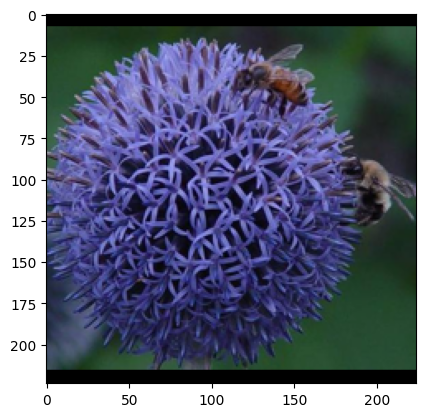

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

print(imshow(process_image(test_dir + '/10/image_07090.jpg')))

In [ ]:
def predict(image_path, model, top_k=5):

    """Predict the top K classes for an input image using a trained model."""
    model.eval()  # Set to evaluation mode
    image = process_image(image_path).unsqueeze(0)  # Add batch dimension
    image = image.to(next(model.parameters()).device)  # Move to correct device

    # Forward pass through the model
    with torch.no_grad():
        output = model(image)

    # Convert output to probabilities using softmax
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Get top K probabilities and class indices
    top_probs, top_indices = probabilities.topk(top_k)

    # idx_to_class = {val: key for key, val in model.class_to_idx.items()}

    # # Convert to lists (with correct class labels)
    # top_probs = top_probs.cpu().numpy().tolist()
    # top_classes = [idx_to_class[idx] for idx in top_indices.cpu().numpy()]

    # return top_probs, top_classes
    # Convert to lists
    top_probs = top_probs.cpu().numpy().tolist()
    top_classes = [str(idx) for idx in top_indices.cpu().numpy()]

    return top_probs, top_classes
# model = load_checkpoint('checkpoint.pth')  # Load trained model

print(predict(test_dir + '/10/image_07090.jpg', models.resnet34(pretrained=True)))

([0.6806221008300781, 0.15198902785778046, 0.0714113861322403, 0.06279337406158447, 0.010226325131952763], ['946', '944', '309', '328', '990'])


In [ ]:
image_path = test_dir + "/10/image_07090.jpg"  # Replace with your image path
probs, classes = predict(image_path, resnet)

print("Probabilities:", probs)
print("Classes:", classes)


Probabilities: [0.930687665939331, 0.03372465446591377, 0.023872170597314835, 0.010008892975747585, 0.0005599806900136173]
Classes: ['1', '24', '34', '17', '8']


In [ ]:

def display_prediction(image_path, model, class_to_name, top_k=5):
    """Display an image along with its top K predicted classes as a bar chart."""
    # Get predictions
    probs, classes = predict(image_path, model, top_k=top_k)

    # Convert class indices to actual names
    class_names = [class_to_name[cls] for cls in classes]

    # Load and display the input image
    image = Image.open(image_path)

    # Plot Image and Bar Chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Display the image
    ax1.imshow(image)
    ax1.axis("off")  # Hide axes
    ax1.set_title("Input Image")

    # Plot top 5 probabilities
    sns.barplot(x=probs, y=class_names, ax=ax2, palette="viridis")
    ax2.set_xlabel("Probability")
    ax2.set_title("Top 5 Predictions")

    plt.show()


<ipython-input-20-976d58d8912e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=class_names, ax=ax2, palette="viridis")


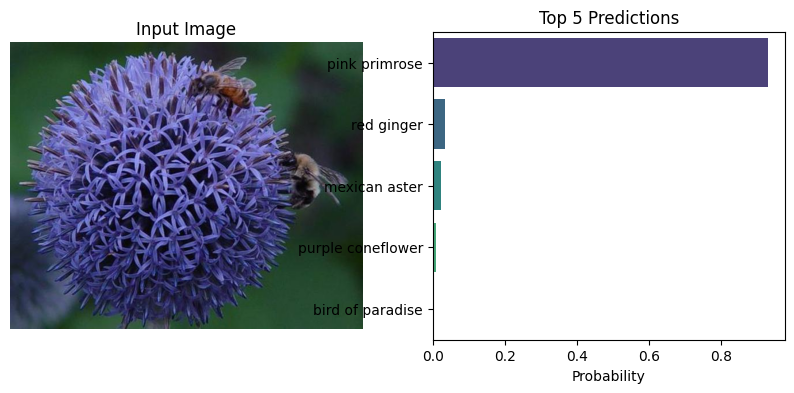

In [ ]:
# Load category name mapping
with open("cat_to_name.json", "r") as f:
    cat_to_name = json.load(f)

# Provide an image path
image_path = test_dir + "/10/image_07090.jpg"

# Display the image and predictions
display_prediction(image_path, resnet, cat_to_name)


In [4]:
%%writefile train.py
import torch
import argparse
import matplotlib.pyplot as plt
import os
from torchvision import datasets, transforms, models
from torch import nn, optim

def get_input_args():
    parser = argparse.ArgumentParser(description="Train an image classifier")
    parser.add_argument("data_dir", type=str, help="Path to dataset")
    parser.add_argument("--save_dir", type=str, default="checkpoints", help="Directory to save checkpoint")
    parser.add_argument("--arch", type=str, default="resnet34", help="Model architecture")
    parser.add_argument("--learning_rate", type=float, default=0.001, help="Learning rate")
    parser.add_argument("--epochs", type=int, default=5, help="Number of training epochs")
    parser.add_argument("--gpu", action="store_true", help="Use GPU if available")
    return parser.parse_args()

def plot_training_curves(train_losses, val_losses, val_accuracies, save_path):
    """Plot and save training metrics visualization"""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.savefig(save_path)
    plt.close()

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path)
    plt.close()

def train():
    args = get_input_args()
    device = torch.device("cuda" if args.gpu and torch.cuda.is_available() else "cpu")

    # Create assets directory for visualizations
    os.makedirs("assets", exist_ok=True)

    # Data transforms
    data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    train_dir = args.data_dir + '/train'
    valid_dir = args.data_dir + '/valid'
    # Load datasets
    train_data = datasets.ImageFolder(train_dir, transform=data_transforms)
    val_data = datasets.ImageFolder(valid_dir, transform=data_transforms)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=False)

    # Initialize model
    model = models.resnet34(pretrained=True)

    # Freeze pretrained layers
    for param in model.parameters():
        param.requires_grad = False

    # Custom classifier
    classifier = nn.Sequential(
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, len(train_data.classes)),
        nn.LogSoftmax(dim=1)
    )

    model.fc = classifier
    model = model.to(device)

    # Loss and optimizer
    criterion = nn.NLLLoss()
    optimizer = optim.AdamW(model.fc.parameters(), lr=args.learning_rate, weight_decay=1e-2)

    # Track metrics
    train_losses = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(args.epochs):
        model.train()
        running_loss = 0.0

        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)

                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Calculate metrics
        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        val_acc = (correct / total) * 100

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{args.epochs}")
        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Save training curves
    plot_training_curves(train_losses, val_losses, val_accuracies, "assets/training_curves.png")

    # Save checkpoint
    os.makedirs(args.save_dir, exist_ok=True)
    checkpoint = {
        "arch": "resnet34",
        "class_to_idx": train_data.class_to_idx,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "epochs": args.epochs,
        "val_accuracy": val_acc,
        "classifier": classifier
    }
    torch.save(checkpoint, f"{args.save_dir}/checkpoint.pth")
    print(f"\nTraining complete! Checkpoint saved to {args.save_dir}/checkpoint.pth")

if __name__ == "__main__":
    train()

Writing train.py


In [5]:
%%writefile predict.py
import torch
import argparse
import json
import numpy as np
from torchvision import models,transforms
from torch import nn,optim
from PIL import Image

# Load checkpoint function
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath, map_location= "cpu")

    model = models.resnet34(pretrained=True)

    # Define classifier (should match train.py)
    classifier = nn.Sequential(
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, len(checkpoint["class_to_idx"])),  # Match number of classes
        nn.LogSoftmax(dim=1)
    )

    model.fc = classifier
    model.load_state_dict(checkpoint["model_state_dict"])
    model.class_to_idx = checkpoint["class_to_idx"]
    print(model.class_to_idx)
    return model

# Image processing function
def process_image(image_path):
    image = Image.open(image_path)

    # Define preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image = transform(image)
    return image.unsqueeze(0)  # Add batch dimension

# Prediction function
# Prediction function
def predict(image_path, model, top_k=5):
    model.eval()
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    image = process_image(image_path).to(device)

    with torch.no_grad():
        output = model(image)

    # Get number of classes from model
    num_classes = len(model.class_to_idx)

    # Ensure top_k does not exceed available classes
    top_k = min(top_k, num_classes)

    # Get top-k predictions
    probabilities, indices = torch.exp(output).topk(top_k)

    probabilities = probabilities.cpu().numpy().squeeze()
    indices = indices.cpu().numpy().squeeze()

    # Convert indices to actual class labels
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    classes = [str(idx_to_class[idx]) for idx in indices]
    # print(f"Predicted indices: {indices}")
    # print(f"idx_to_class mapping: {idx_to_class}")
    # print(f"Initial mapped classes: {classes}")

    return probabilities, classes

# Command-line argument parsing
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Predict flower name using a trained model.")
    parser.add_argument("image_path", type=str, help="Path to input image")
    parser.add_argument("checkpoint", type=str, help="Path to saved model checkpoint")
    parser.add_argument("--top_k", type=int, default=5, help="Return top K most likely classes")
    parser.add_argument("--category_names", type=str, help="Path to JSON file mapping categories to real names")
    parser.add_argument("--gpu", action="store_true", help="Use GPU for inference")

    args = parser.parse_args()

    # Load model
    model = load_checkpoint(args.checkpoint)
    model = model.to("cuda" if args.gpu and torch.cuda.is_available() else "cpu")

    # Make prediction
    probabilities, classes = predict(args.image_path, model, args.top_k)



    # Load category names if provided
    if args.category_names:
        with open(args.category_names, 'r') as f:
            cat_to_name = json.load(f)
        classes = [cat_to_name.get(cls, "Unknown") for cls in classes]

    # Print results
    print(f"Top {args.top_k} Predictions:")
    for i in range(len(classes)):
        print(f"{classes[i]}: {probabilities[i]:.4f}")
    print(f"Predicted class labels before mapping: {classes}")
    print(model.class_to_idx)


Writing predict.py


In [9]:
%%writefile test.py
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torchvision import datasets, transforms
from predict import load_checkpoint
import json

def test_model(checkpoint_path, data_dir):
    # Load model
    model = load_checkpoint(checkpoint_path)
    model.eval()

    # Load test data
    test_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

    # Collect predictions
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.numpy())
            pred_labels.extend(preds.numpy())

    # Load category to name mapping
    with open('cat_to_name.json') as f:
        cat_to_name = json.load(f)

    # Convert numeric labels to actual flower names
    true_names = [cat_to_name[str(idx+1)] for idx in true_labels]
    pred_names = [cat_to_name[str(idx+1)] for idx in pred_labels]

    # 1) Create a sorted list of unique labels used by confusion_matrix
    unique_labels = sorted(set(true_names + pred_names))

    # 2) Generate confusion matrix, specifying the exact label order
    cm = confusion_matrix(true_names, pred_names, labels=unique_labels, normalize='true')

    # Plot the confusion matrix
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=False, fmt='.2f', cmap='Blues',
                xticklabels=unique_labels,
                yticklabels=unique_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix')
    plt.savefig('assets/confusion_matrix.png')
    plt.close()

    # 3) Print misclassified classes for each row
    for i, true_label in enumerate(unique_labels):
        misclassified = []
        row = cm[i]

        for j, proportion in enumerate(row):
            # If the model confuses class i with class j
            if j != i and proportion > 0:
                misclassified.append((unique_labels[j], proportion))

        if misclassified:
            print(f"Actual class '{true_label}' was misclassified as:")
            for pred_label, prop in misclassified:
                print(f"  - {pred_label} ({prop:.2f} of the time)")
        else:
            print(f"Actual class '{true_label}' was never misclassified.")

if __name__ == '__main__':
    test_model('checkpoints/checkpoint.pth', 'flowers/')


Overwriting test.py


In [7]:
# Train with visualization generation
!python train.py flowers/ --gpu --epochs 10

# Training curves will be saved to:
# assets/training_curves.png

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100% 83.3M/83.3M [00:00<00:00, 164MB/s]
Epoch 1/10
Train Loss: 2.4172 | Val Loss: 0.8247 | Val Acc: 81.17%
Epoch 2/10
Train Loss: 0.7251 | Val Loss: 0.5128 | Val Acc: 88.39%
Epoch 3/10
Train Loss: 0.4653 | Val Loss: 0.4029 | Val Acc: 88.02%
Epo

In [ ]:
!python train.py /content/flowers --save_dir /content --epochs 5 --gpu

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch [1/5], Loss: 2.4780
Epoch [2/5], Loss: 0.7671
Epoch [3/5], Loss: 0.4981
Epoch [4/5], Loss: 0.3641
Epoch [5/5], Loss: 0.2932
Training complete. Model saved!


In [10]:
!python test.py


/content/predict.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath, map_location= "cpu")
/usr/local/lib/python3.11/dist-packages/torchvis

In [ ]:
!python predict.py /content/flowers/valid/1/image_06739.jpg /content/checkpoint.pth --top_k 5 --category_names cat_to_name.json --gpu


/content/predict.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath, map_location= "cpu")
/usr/local/lib/python3.11/dist-packages/torchvis

In [ ]:
!chmod +x predict.py